In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

import math

In [ ]:
df = pd.read_csv("finalTrain.csv")
fp = pd.read_csv("finalPredict.csv")

       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         1         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
59995       0       0       0       0  ...         0         0         0         0
59996       0       0       0       0  ...         0         0         0         0
59997       0       0       0       0  ...         2         0         0         0
59998       0       0       0       0  ...         0         0         0         0
59999       0       0       0       0  ...         0         0         0         0

[60

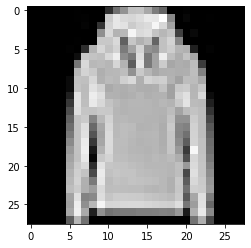

In [ ]:
dfraw = df.drop("label", axis=1)
# Generate random array 
width = int(math.sqrt(len(dfraw.loc[0,:]))) 
#print(width)
length = int(math.sqrt(len(dfraw.loc[0,:])))

print(dfraw)
iMat = dfraw.to_numpy()
# Show it! 
plt.imshow(iMat[2].reshape(width, length),'gray') 
plt.show()  

In [ ]:
def data_split(examples, labels, train_frac, random_state=5):
    ''' https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    param data:       Data to be split
    param train_frac: Ratio of train set to whole dataset

    Randomly split dataset, based on these ratios:
        'train': train_frac
        'valid': (1-train_frac) / 2
        'test':  (1-train_frac) / 2

    Eg: passing train_frac=0.8 gives a 80% / 10% / 10% split
    '''

    X_train, X_tmp, Y_train, Y_tmp = train_test_split(
        examples, labels, train_size=train_frac, random_state=random_state)

    X_val, X_test, Y_val, Y_test = train_test_split(X_tmp,
                                                    Y_tmp,
                                                    train_size=0.5,
                                                    random_state=random_state)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = data_split(examples=df.drop("label", axis=1),
                                                            labels=df.label,train_frac=0.1)

In [ ]:
def scores(actual, prediction):
    print("RMSE score is {:3f}".format(
        mean_squared_error(actual, prediction, squared=False)))
    print("R^2 score is {:3f}".format(r2_score(actual, prediction)))

In [ ]:
clf = OneVsRestClassifier(SVC()).fit(X_train, Y_train)

In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_pred_test)

0.8528888888888889

In [ ]:
y_pred = clf.predict(fp)

In [ ]:
test = np.array()

In [ ]:
pd.DataFrame(y_pred).to_csv("team3results.csv", header = False, index = False)

